# 0.0 Imports

In [1]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from IPython.display import Image

## Helper Functions

In [27]:
sns.set(style="darkgrid")
plt.rc("figure", figsize=(20, 10))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 4.0. PASSO 04 - ANÁLISE EXPLORATÓRIA DOS DADOS

In [3]:
df4 = pd.read_csv("data/eda.csv")
df4.sample(5)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
466060,630,4,2014-02-13,5942,0,regular_day,0,a,basic,1690.0,...,0,2014,2,13,7,2014-06,2015-04-01,-14,2014-02-10,0
509942,159,5,2013-12-27,6674,0,regular_day,1,d,basic,8530.0,...,0,2013,12,27,52,2013-51,2013-03-01,10,2013-12-23,0
710749,163,1,2013-05-27,8902,1,regular_day,0,a,basic,1480.0,...,0,2013,5,27,22,2013-21,2009-04-01,50,2013-05-27,0
313472,916,1,2014-08-04,6943,1,regular_day,1,a,basic,90.0,...,0,2014,8,4,32,2014-31,2012-11-01,21,2014-08-04,0
606294,999,6,2013-09-14,4764,0,regular_day,0,d,extended,15140.0,...,0,2013,9,14,37,2013-36,2002-02-01,141,2009-09-07,209


## 4.1. Análise Univariada

### 4.1.1. Response Variable

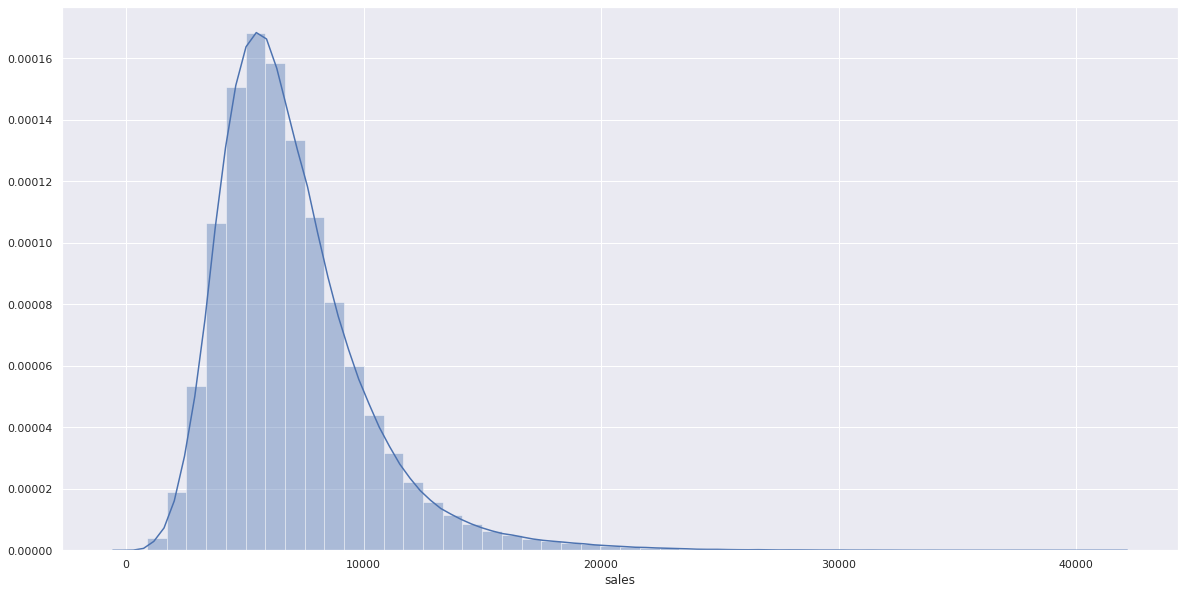

In [10]:
sns.distplot( (df4["sales"]) )

### 4.1.2. Numerical Variables

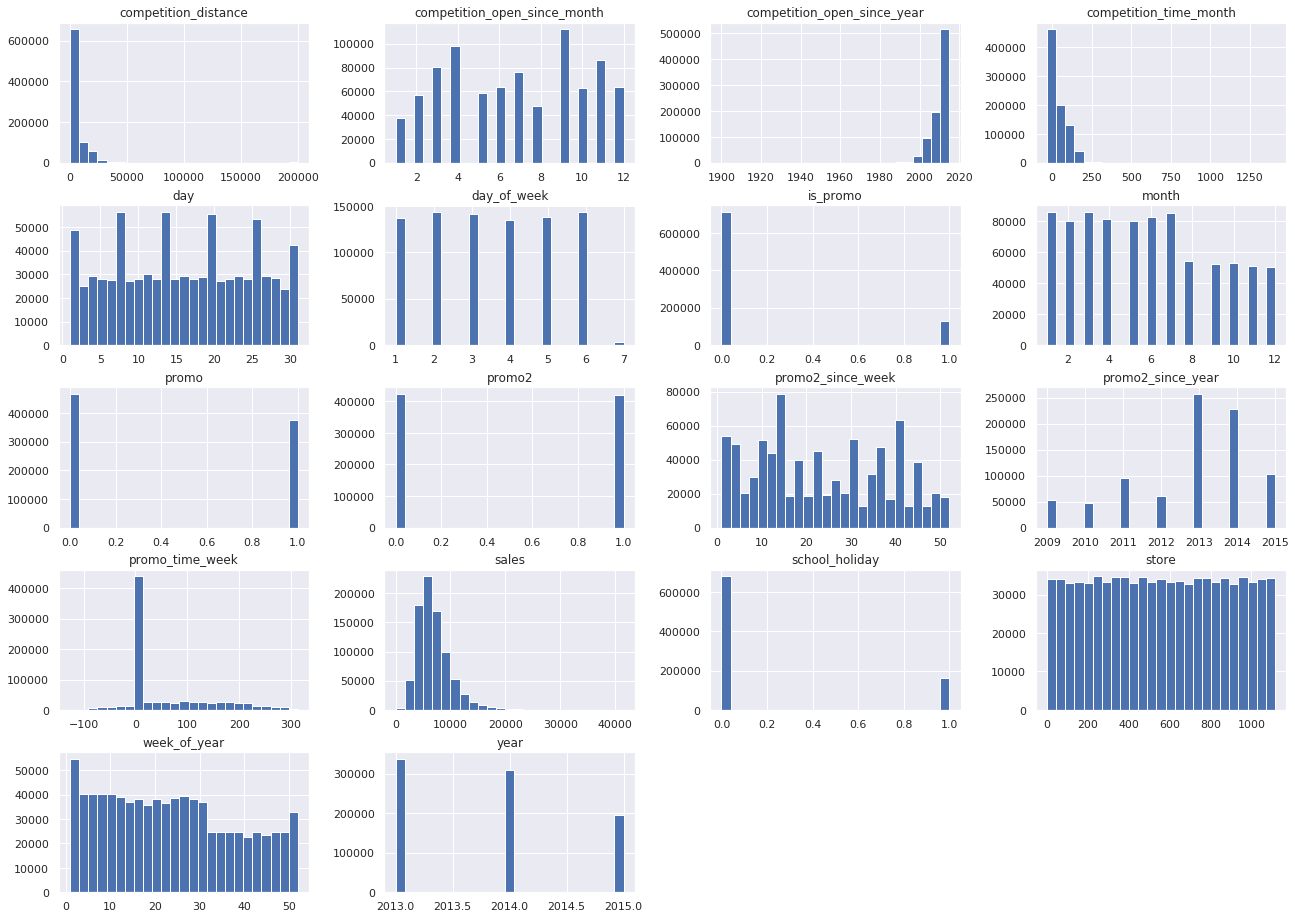

In [13]:
num_attributes = df4.select_dtypes(include=["int64", "float64"])
num_attributes.hist(bins=25, figsize=(22, 16));

### 4.1.3. Categorical Variable

In [6]:
cat_attributes = df4.select_dtypes(exclude=["int64", "float64", "datetime64[ns]"])
cat_attributes.head()

,date,state_holiday,store_type,assortment,year_week,competition_since,promo_since
0,2015-07-31,regular_day,c,basic,2015-30,2008-09-01,2015-07-27
1,2015-07-31,regular_day,a,basic,2015-30,2007-11-01,2010-03-22
2,2015-07-31,regular_day,a,basic,2015-30,2006-12-01,2011-03-28
3,2015-07-31,regular_day,c,extended,2015-30,2009-09-01,2015-07-27
4,2015-07-31,regular_day,a,basic,2015-30,2015-04-01,2015-07-27


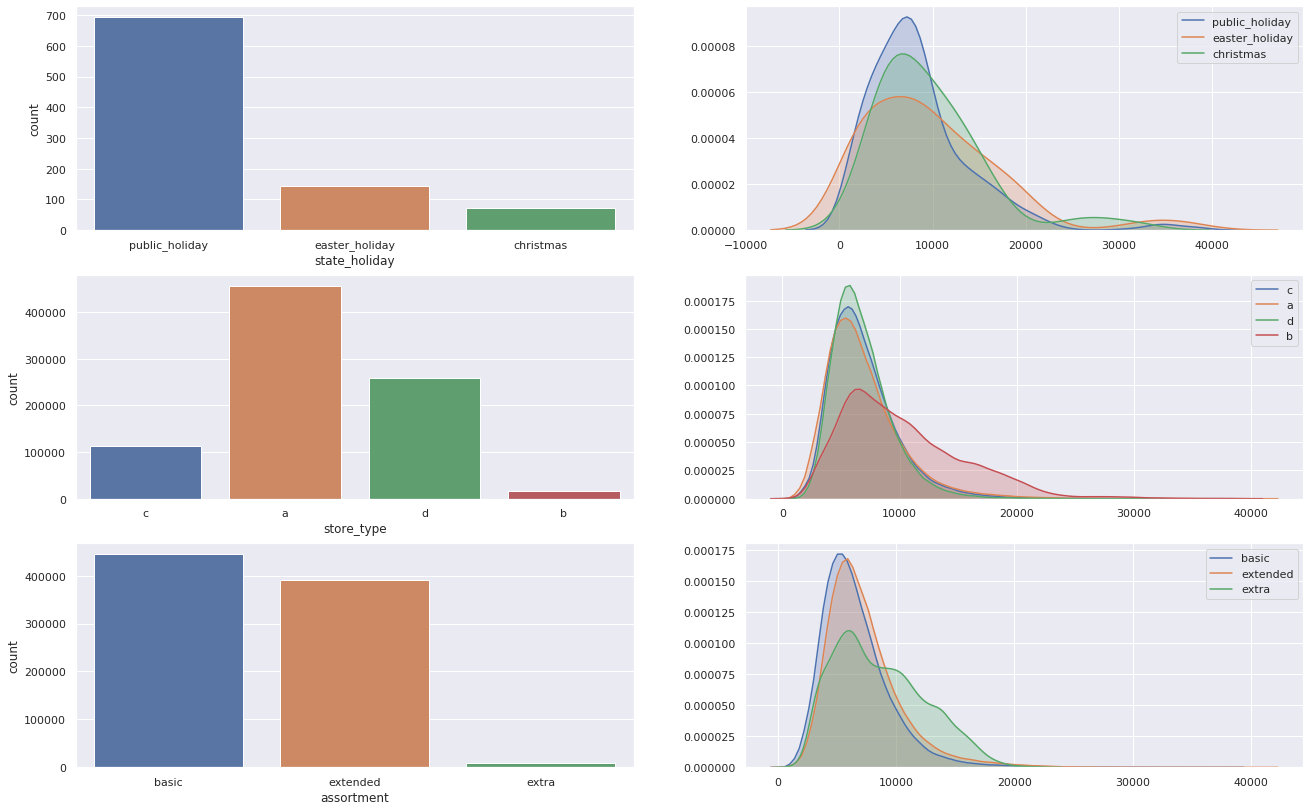

In [26]:
# state_holiday
aux = df4[df4["state_holiday"] != "regular_day"]

plt.figure(figsize=(22, 14))

plt.subplot(3, 2, 1)
sns.countplot(data=aux, x="state_holiday")

plt.subplot(3, 2, 2)
sns.kdeplot(aux.query("state_holiday == 'public_holiday'")["sales"], label="public_holiday", shade=True)
sns.kdeplot(aux.query("state_holiday == 'easter_holiday'")["sales"], label="easter_holiday", shade=True)
sns.kdeplot(aux.query("state_holiday == 'christmas'")["sales"], label="christmas", shade=True)

# store_type
plt.subplot(3, 2, 3)
sns.countplot(data=df4, x="store_type")

plt.subplot(3, 2, 4)
sns.kdeplot(df4.query("store_type == 'c'")["sales"], label="c", shade=True)
sns.kdeplot(df4.query("store_type == 'a'")["sales"], label="a", shade=True)
sns.kdeplot(df4.query("store_type == 'd'")["sales"], label="d", shade=True)
sns.kdeplot(df4.query("store_type == 'b'")["sales"], label="b", shade=True)

# assortment
plt.subplot(3, 2, 5)
sns.countplot(data=df4, x="assortment")

plt.subplot(3, 2, 6)
sns.kdeplot(df4.query("assortment == 'basic'")["sales"], label="basic", shade=True)
sns.kdeplot(df4.query("assortment == 'extended'")["sales"], label="extended", shade=True)
sns.kdeplot(df4.query("assortment == 'extra'")["sales"], label="extra", shade=True)

## 4.2. Análise Bivariada

## 4.3. Análise Multivariada